In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [3]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [5]:
race = ff1.get_session(2021, 'Russia', 'R')
race.load(telemetry=True)

core           INFO 	Loading data for Russian Grand Prix - Race [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written

In [11]:
laps = race.laps
laps.dtypes

Time                  timedelta64[ns]
Driver                         object
DriverNumber                   object
LapTime               timedelta64[ns]
LapNumber                     float64
Stint                         float64
PitOutTime            timedelta64[ns]
PitInTime             timedelta64[ns]
Sector1Time           timedelta64[ns]
Sector2Time           timedelta64[ns]
Sector3Time           timedelta64[ns]
Sector1SessionTime    timedelta64[ns]
Sector2SessionTime    timedelta64[ns]
Sector3SessionTime    timedelta64[ns]
SpeedI1                       float64
SpeedI2                       float64
SpeedFL                       float64
SpeedST                       float64
IsPersonalBest                   bool
Compound                       object
TyreLife                      float64
FreshTyre                        bool
Team                           object
LapStartTime          timedelta64[ns]
LapStartDate           datetime64[ns]
TrackStatus                    object
Position    

In [15]:
laps['RaceLapNumber'] = laps['LapNumber'] - 1
laps = laps.loc[laps['RaceLapNumber'] >= 45]

In [17]:
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,RaceLapNumber
45,0 days 02:20:03.962000,HAM,44,0 days 00:01:38.942000,46.0,2.0,NaT,NaT,0 days 00:00:35.421000,0 days 00:00:34.746000,...,Mercedes,0 days 02:18:25.020000,2021-09-26 13:19:26.913,1,2.0,False,,False,True,45.0
46,0 days 02:21:46.574000,HAM,44,0 days 00:01:42.612000,47.0,2.0,NaT,NaT,0 days 00:00:35.607000,0 days 00:00:37.453000,...,Mercedes,0 days 02:20:03.962000,2021-09-26 13:21:05.855,1,2.0,False,,False,True,46.0
47,0 days 02:23:42.304000,HAM,44,0 days 00:01:55.730000,48.0,2.0,NaT,NaT,0 days 00:00:38.142000,0 days 00:00:44.200000,...,Mercedes,0 days 02:21:46.574000,2021-09-26 13:22:48.467,2,2.0,False,,False,True,47.0
48,0 days 02:25:39.183000,HAM,44,0 days 00:01:56.879000,49.0,2.0,NaT,0 days 02:25:30.666000,0 days 00:00:37.695000,0 days 00:00:43.480000,...,Mercedes,0 days 02:23:42.304000,2021-09-26 13:24:44.197,2,2.0,False,,False,False,48.0
49,0 days 02:27:45.499000,HAM,44,0 days 00:02:06.316000,50.0,3.0,0 days 02:26:00.701000,NaT,0 days 00:00:56.972000,0 days 00:00:38.328000,...,Mercedes,0 days 02:25:39.183000,2021-09-26 13:26:41.076,1,2.0,False,,False,False,49.0


In [23]:
drivers = pd.unique(laps['Driver'])
drivers

array(['HAM', 'VER', 'SAI', 'RIC', 'BOT', 'ALO', 'NOR', 'RAI', 'PER',
       'RUS', 'STR', 'VET', 'GAS', 'OCO', 'LEC', 'GIO', 'TSU', 'MAZ',
       'LAT'], dtype=object)

In [35]:
telemetry = pd.DataFrame()

for driver in drivers:
    driver_laps = laps.pick_driver(driver)
    for lap in driver_laps.iterlaps():
        driver_telemetry = lap[1].get_telemetry().add_distance()
        driver_telemetry['Driver'] = driver
        driver_telemetry['Lap'] = lap[1]['RaceLapNumber']
        driver_telemetry['Compound'] = lap[1]['Compound']
        telemetry = telemetry.append(driver_telemetry)

In [36]:
telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Lap,Compound
2,2021-09-26 13:19:26.913,0 days 02:18:25.020000,,84.053889,0 days 00:00:00,11267,178,4,100,False,...,interpolation,0.000068,OnTrack,1281,-416,228,0.000000,HAM,45.0,HARD
3,2021-09-26 13:19:26.914,0 days 02:18:25.021000,,84.053889,0 days 00:00:00.001000,11376,181,4,100,False,...,pos,0.000077,OnTrack,1281,-417,228,0.050278,HAM,45.0,HARD
4,2021-09-26 13:19:27.035,0 days 02:18:25.142000,,84.053889,0 days 00:00:00.122000,11594,188,4,100,False,...,car,0.001173,OnTrack,1246,-466,227,6.369167,HAM,45.0,HARD
5,2021-09-26 13:19:27.134,0 days 02:18:25.241000,,84.053889,0 days 00:00:00.221000,11884,190,4,100,False,...,pos,0.002078,OnTrack,1216,-511,228,11.594167,HAM,45.0,HARD
6,2021-09-26 13:19:27.275,0 days 02:18:25.382000,4,84.053889,0 days 00:00:00.362000,12175,192,4,100,False,...,car,0.003383,OnTrack,1173,-573,228,19.114167,HAM,45.0,HARD


In [37]:
telemetry = telemetry[['Lap', 'Distance', 'Compound', 'Speed', 'X','Y']]
telemetry['Compound'].loc[telemetry['Compound'] != 'INTERMEDIATE'] = 'SLICK'
telemetry.head()

,Lap,Distance,Compound,Speed,X,Y
2,45.0,0.000000,SLICK,178,1281,-416
3,45.0,0.050278,SLICK,181,1281,-417
4,45.0,6.369167,SLICK,188,1246,-466
5,45.0,11.594167,SLICK,190,1216,-511
6,45.0,19.114167,SLICK,192,1173,-573


In [44]:
num_minisectors = 25
total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
minisectors = []

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    
print(total_distance)
print(minisectors)

5849.170833333333
[233.9668333333333, 467.9336666666666, 701.9005, 935.8673333333332, 1169.8341666666665, 1403.801, 1637.767833333333, 1871.7346666666665, 2105.7014999999997, 2339.668333333333, 2573.6351666666665, 2807.602, 3041.5688333333333, 3275.535666666666, 3509.5024999999996, 3743.469333333333, 3977.4361666666664, 4211.402999999999, 4445.369833333333, 4679.336666666666, 4913.3035, 5147.270333333333, 5381.237166666666, 5615.204]


In [42]:
telemetry['Minisector'] = telemetry['Distance'].apply(
  lambda z: (
    minisectors.index(
      min(minisectors, key=lambda x: abs(x-z)))+1
  )
)

In [49]:
average_speed = telemetry.groupby(['Lap', 'Minisector', 'Compound'])['Speed'].mean().reset_index()
average_speed

,Lap,Minisector,Compound,Speed
0,45.0,1,SLICK,243.831991
1,45.0,2,SLICK,291.652083
2,45.0,3,SLICK,301.067100
3,45.0,4,SLICK,300.696970
4,45.0,5,SLICK,166.116608
...,...,...,...,...
307,52.0,20,INTERMEDIATE,127.020281
308,52.0,21,INTERMEDIATE,141.118467
309,52.0,22,INTERMEDIATE,108.183646
310,52.0,23,INTERMEDIATE,209.632812


In [50]:
fastest_compounds = average_speed.loc[average_speed.groupby(['Lap', 'Minisector'])['Speed'].idxmax()]
fastest_compounds = fastest_compounds[['Lap', 'Minisector', 'Compound']].rename(columns={'Compound': 'Fastest_compound'})
fastest_compounds

,Lap,Minisector,Fastest_compound
0,45.0,1,SLICK
1,45.0,2,SLICK
2,45.0,3,SLICK
3,45.0,4,SLICK
4,45.0,5,SLICK
...,...,...,...
307,52.0,20,INTERMEDIATE
308,52.0,21,INTERMEDIATE
309,52.0,22,INTERMEDIATE
310,52.0,23,INTERMEDIATE


In [51]:
telemetry = telemetry.merge(fastest_compounds, on=['Lap', 'Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry.loc[telemetry['Fastest_compound'] == "INTERMEDIATE", 'Fastest_compound_int'] = 1
telemetry.loc[telemetry['Fastest_compound'] == "SLICK", 'Fastest_compound_int'] = 2
telemetry

,Lap,Distance,Compound,Speed,X,Y,Minisector,Fastest_compound,Fastest_compound_int
0,45.0,0.000000,SLICK,178,1281,-416,1,SLICK,2.0
97524,50.0,0.000000,SLICK,132,1273,-427,1,SLICK,2.0
97298,50.0,0.000000,INTERMEDIATE,60,1152,-254,1,SLICK,2.0
97077,50.0,0.000000,INTERMEDIATE,59,1151,-251,1,SLICK,2.0
96856,50.0,0.000000,INTERMEDIATE,59,1155,-249,1,SLICK,2.0
...,...,...,...,...,...,...,...,...,...
116476,50.0,5841.870833,SLICK,60,1204,-173,24,INTERMEDIATE,1.0
116477,50.0,5841.937500,SLICK,60,1203,-173,24,INTERMEDIATE,1.0
116478,50.0,5845.537500,SLICK,60,1180,-210,24,INTERMEDIATE,1.0
116479,50.0,5845.937500,SLICK,60,1177,-214,24,INTERMEDIATE,1.0


In [56]:
def generate_minisector_plot(lap, save=False, details=True):
    single_lap = telemetry.loc[telemetry['Lap'] == lap]

    x = np.array(single_lap['X'].values)
    y = np.array(single_lap['Y'].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    compound = single_lap['Fastest_compound_int'].to_numpy().astype(float)

    cmap = cm.get_cmap('ocean', 2)
    lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
    lc_comp.set_array(compound)
    lc_comp.set_linewidth(2)

    plt.rcParams['figure.figsize'] = [12, 5]
    
    if details:
        title = plt.suptitle(
            f"2021 Russian GP \n Lap {lap} - Slicks vs. Inters"
        )
        
    plt.gca().add_collection(lc_comp)
    plt.axis('equal')
    plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    
    if details:
        cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1, 4))
        cbar.set_ticks(np.arange(1.5, 9.5))
        cbar.set_ticklabels(['Inters', 'Slicks'])

    plt.show()

/var/folders/pr/b_ytjflj1fqffyn22t_b8x_m0000gn/T/ipykernel_88339/96132427.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('ocean', 2)


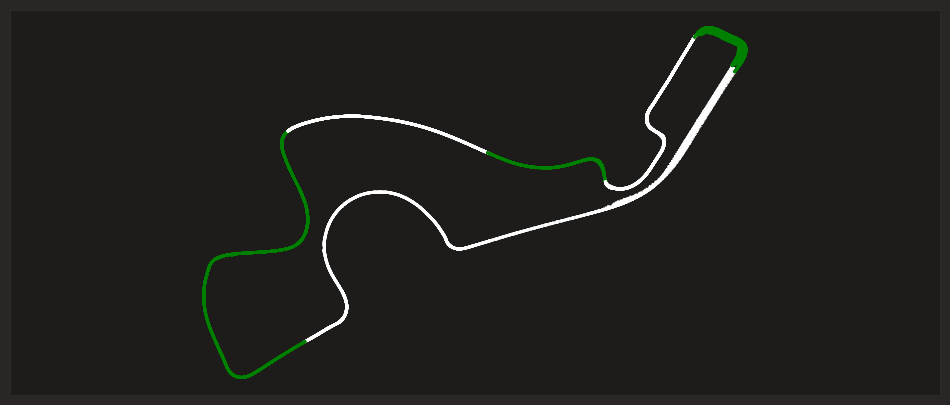

In [57]:
generate_minisector_plot(46, save=True, details=False)